# Data 220: Maths Lab-1

### Part-1: Exploratory Data Analysis on Heart Patients

#### Use the heart-train.csv and heart-test.csv dataset.Please perform the following questions in Python and submit an ipynb file. 

#### Please note that this notebook is used to perform the calculations. The detailed explanation of all the actions performed here is discussed in the report attached alongwith.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
### First we will take heart train dataset to understand the data. 
### It has 10 columns comprising of the different readings of each patient.

heart_train = pd.read_csv('heart-train.csv')

#### Present insights about the data - DATA Exploration

In [3]:
heart_train.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,139.240291,3.666262,4.589539,25.151214,52.135922,25.802112,18.030073,42.686893,0.332524
std,20.451903,4.518501,1.883744,7.740794,9.592727,4.081745,25.298909,15.129338,0.471690
min,101.000000,0.000000,0.980000,6.740000,20.000000,17.890000,0.000000,15.000000,0.000000
25%,125.500000,0.037500,3.240000,19.397500,46.000000,22.737500,0.447500,30.750000,0.000000
50%,136.000000,1.805000,4.225000,26.090000,52.000000,25.635000,7.510000,45.000000,0.000000
75%,148.000000,5.850000,5.527500,30.755000,58.000000,28.167500,24.960000,57.000000,1.000000
max,218.000000,27.400000,14.160000,42.490000,73.000000,45.720000,145.290000,64.000000,1.000000


#### Find the number of null values for each column.

In [4]:
#Check the data type for each column and check for missing values if any

heart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        412 non-null    int64  
 1   tobacco    412 non-null    float64
 2   ldl        412 non-null    float64
 3   adiposity  412 non-null    float64
 4   famhist    412 non-null    object 
 5   typea      412 non-null    int64  
 6   obesity    412 non-null    float64
 7   alcohol    412 non-null    float64
 8   age        412 non-null    int64  
 9   chd        412 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 32.3+ KB


In [5]:
# Determine the no. of rows and columns of the dataset

heart_train.shape

(412, 10)

In [6]:
heart_train.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [7]:
print("The top 5 rows of the heart-train\n")
heart_train.head()

The top 5 rows of the heart-train



,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
1,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
2,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
3,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
4,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0


In [8]:
print("The bottom 5 rows of the heart-train\n")
heart_train.tail()

The bottom 5 rows of the heart-train



,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
407,146,3.60,3.51,22.67,Absent,51,22.29,43.71,42,0
408,206,0.00,4.17,33.23,Absent,69,27.36,6.17,50,1
409,134,3.00,3.17,17.91,Absent,35,26.37,15.12,27,0
410,148,15.00,4.98,36.94,Present,72,31.83,66.27,41,1
411,126,0.21,3.95,15.11,Absent,61,22.17,2.42,17,0


In [9]:
heart_train['famhist'] = heart_train['famhist'].replace(['Present', 'Absent'] , [1, 0])

display(heart_train.head())

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
1,132,6.20,6.47,36.21,1,62,30.77,14.14,45,0
2,142,4.05,3.38,16.20,0,59,20.81,2.62,38,0
3,114,4.08,4.59,14.60,1,62,23.11,6.72,58,1
4,114,0.00,3.83,19.40,1,49,24.86,2.49,29,0


#### Know about the patients :

#### Find the oldest person

In [10]:
# Getting the min age person's entry
print(f" The max age in data set is {heart_train['age'].max()}")
heart_train[heart_train['age'] == heart_train['age'].max()]

 The max age in data set is 64


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
58,158,3.60,2.97,30.11,0,63,26.64,108.00,64,0
70,152,12.18,4.04,37.83,1,63,34.57,4.17,64,0
110,126,0.00,5.98,29.06,1,56,25.39,11.52,64,1
167,148,8.20,7.75,34.46,1,46,26.53,6.04,64,1
170,128,5.16,4.90,31.35,1,57,26.42,0.00,64,0
206,140,8.60,3.90,32.16,1,52,28.51,11.11,64,1
241,160,0.60,6.94,30.53,0,36,25.68,1.42,64,0
256,138,2.00,5.11,31.40,1,49,27.25,2.06,64,1
276,128,0.73,3.97,23.52,0,54,23.81,19.20,64,0
348,140,8.60,3.90,32.16,1,52,28.51,11.11,64,1


##### Find the youngest person

In [11]:
# Getting the min age person's entries
print(f" The min age in data set is {heart_train['age'].min()}")
heart_train[heart_train['age'] == heart_train['age'].min()]

 The min age in data set is 15


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
9,132,0.0,1.87,17.21,0,49,23.63,0.97,15,0
38,118,0.0,3.67,12.13,0,51,19.15,0.60,15,0


##### There are more patients with age max age i.e 62 than the patients with min age i.e 15


#### Find the average age group

In [12]:
print(f"The Average age is: {statistics.mean(heart_train['age'])}")

The Average age is: 42.68689320388349


#### Find median age

In [13]:
print(f"The median age is: {statistics.median(heart_train['age'])}")

The median age is: 45.0


#### Find the relationship between the deaths and ages
###### To understand the better relationship of deaths and ages, we will divide the age into groups

In [14]:
heart_train['group'] = pd.cut(heart_train['age'], bins = [15,30,45,60,np.inf],include_lowest = True, right = False, labels = ['15-29', '30-44', '45-59', '>= 60'])
display(heart_train.head())

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,group
0,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1,45-59
1,132,6.20,6.47,36.21,1,62,30.77,14.14,45,0,45-59
2,142,4.05,3.38,16.20,0,59,20.81,2.62,38,0,30-44
3,114,4.08,4.59,14.60,1,62,23.11,6.72,58,1,45-59
4,114,0.00,3.83,19.40,1,49,24.86,2.49,29,0,15-29


#### We are taking the counts of dead and alive with each age group. The average age we found earlier, lies in the age group 30-44

In [15]:
heart_train_grp_age_cnt = heart_train.groupby(['group','chd'])['age'].count()
final_df = heart_train_grp_age_cnt.reset_index()
final_df = final_df.rename(columns={'age': 'count'})
display(final_df)

,group,chd,count
0,15-29,0,90
1,15-29,1,6
2,30-44,0,76
3,30-44,1,29
4,45-59,0,73
5,45-59,1,76
6,>= 60,0,36
7,>= 60,1,26


#### To find the relationship between deaths and ages, we are plotting the count of dead vs alive for each age group.

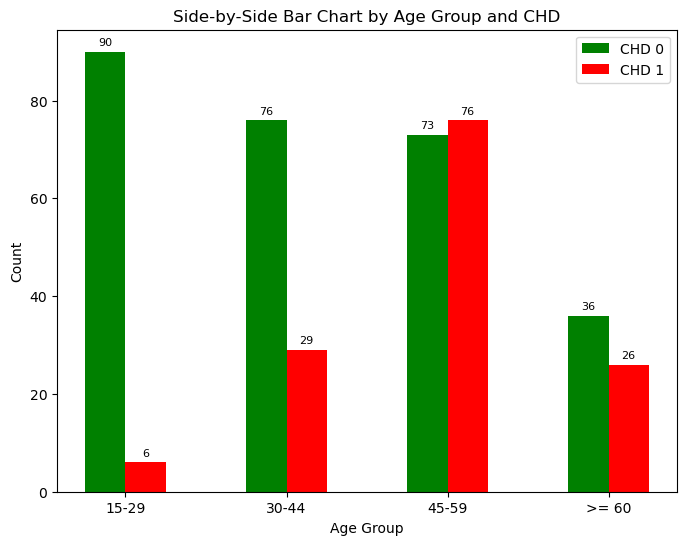

In [16]:
pivot_df = final_df.pivot(index='group', columns='chd', values='count')

x = np.arange(len(pivot_df.index))
bar_width = 0.25

# Plot the side-by-side bar chart
fig, axs = plt.subplots(figsize=(8, 6))
bar1 = axs.bar(x - bar_width / 2, pivot_df[0], bar_width, label='CHD 0', color='green')
bar2 = axs.bar(x + bar_width / 2, pivot_df[1], bar_width, label='CHD 1', color='red')

# Set labels and title
axs.set_xlabel('Age Group')
axs.set_ylabel('Count')
axs.set_title('Side-by-Side Bar Chart by Age Group and CHD')

# Set x-axis ticks and labels
axs.set_xticks(x)
axs.set_xticklabels(pivot_df.index)

axs.legend()
# Add data labels to the bars
def add_data_labels(bars):
    for bar in bars:
        height = bar.get_height()
        axs.annotate(f'{height}',  # Label text
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Label position
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=8)

add_data_labels(bar1)
add_data_labels(bar2)

# Show the plot
plt.show()

#### Find the age groups whose survival rate is the largest:
#### The age group is 15-29

##### Describing this chart :
1. It is clearly seen that highest survival age group is 15-29 and bars are on decreasing trend as the age progresses.
2. We also see that most deaths occurred in age group 45-59. 
3. Based on this, shouldn't we see whats happening to this age group 45-59 that most of the deaths are occuring here. For this we will need to analyse this particular age group clearly.

In [17]:
heart_train_45 = heart_train[(heart_train['age'] >= 45) & (heart_train['age'] <= 59)]
heart_train_45_counts = heart_train_45.groupby(['age', 'chd'])['sbp'].count()
heart_train_45_counts = heart_train_45_counts.reset_index()
heart_train_45_counts = heart_train_45_counts.rename(columns={'sbp': 'count'})

In [18]:
heart_train_45_alive_count = heart_train_45_counts[heart_train_45_counts['chd']== 0]
heart_train_45_dead_count = heart_train_45_counts[heart_train_45_counts['chd']== 1]

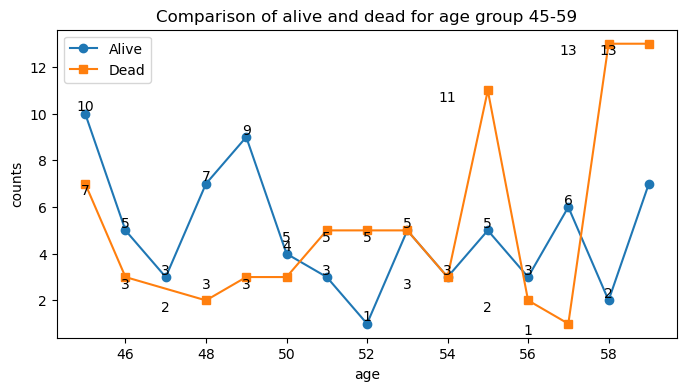

In [19]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(heart_train_45_alive_count['age'], heart_train_45_alive_count['count'], label='Alive', marker='o')
ax.plot(heart_train_45_dead_count['age'], heart_train_45_dead_count['count'], label='Dead', marker='s')

ax.set_xlabel('age')
ax.set_ylabel('counts')
ax.set_title('Comparison of alive and dead for age group 45-59')
ax.legend()

for x, y1, y2 in zip(heart_train_45_alive_count['age'], heart_train_45_alive_count['count'], heart_train_45_dead_count['count']):
    ax.text(x, y1, f'{y1}', ha='center', va='bottom')
    ax.text(x, y2, f'{y2}', ha='center', va='top')
    
plt.show()

##### The above chart shows that maximum deaths are in the age range 58 and 59, but also we see that deaths at 55, increased from 3 at age 54 to 11, which is quite high and soon decreased to the lowest at age 56 and 57. Since its low at 56 and 57, we cannot say with certainity that age can be the only contributing factor. 

#### Get more visuals on data distributions - plotted histogram for all the columns of the dataset

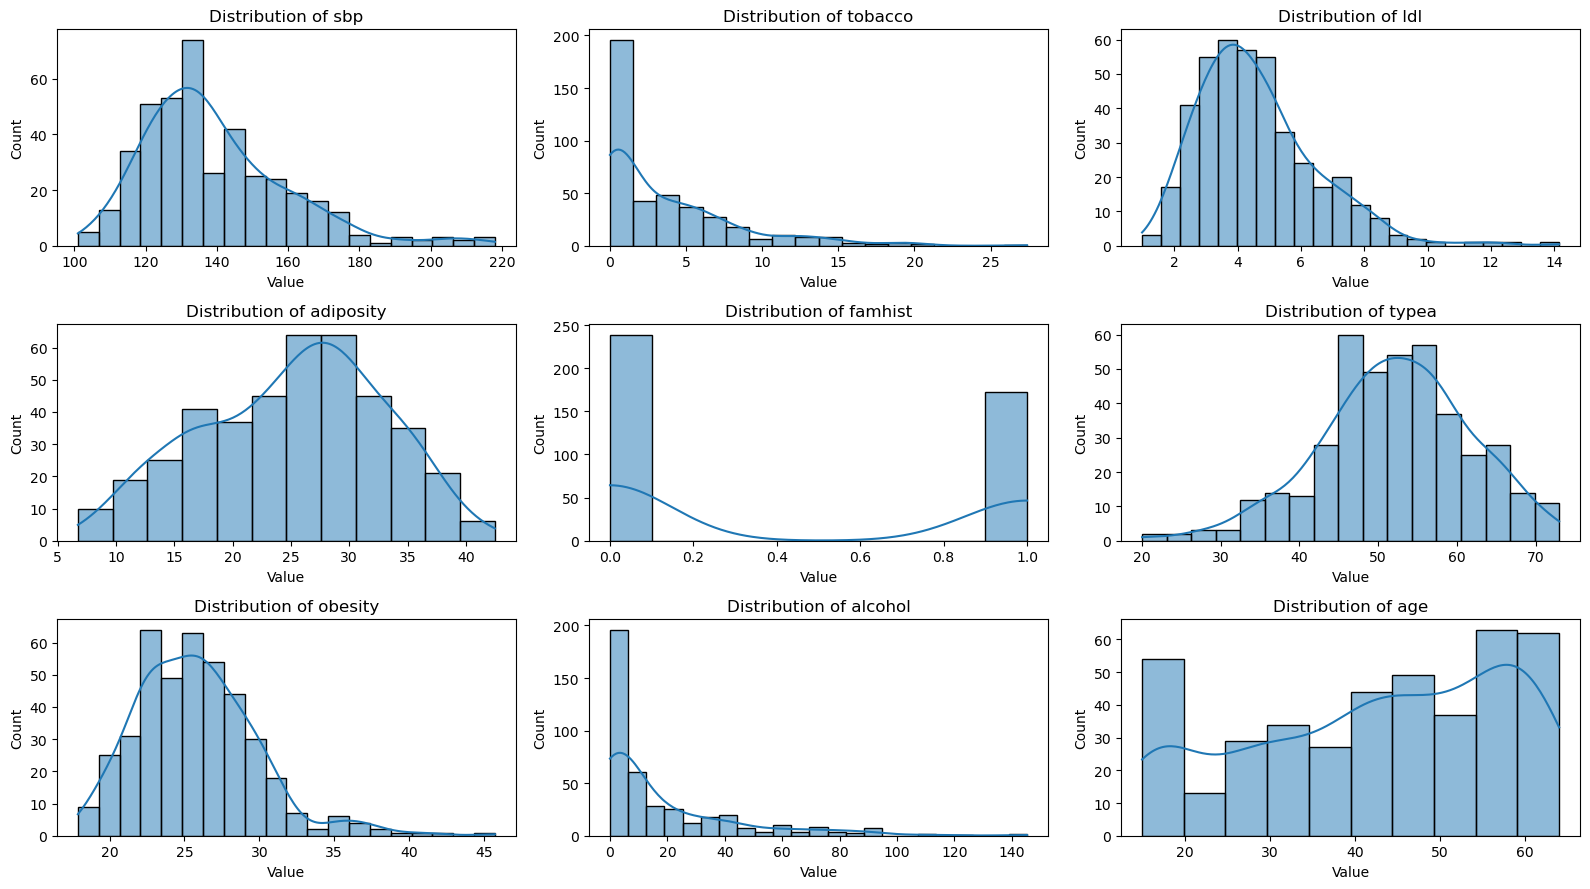

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(16, 9))


for i in range(3):
    for j in range(3):
        if i * 3 + j < len(heart_train.columns):
            sns.histplot(heart_train[heart_train.columns[i * 3 + j]], kde=True, ax=axes[i, j])
            axes[i, j].set_title(f'Distribution of {heart_train.columns[i * 3 + j]}')
            axes[i, j].set_xlabel('Value')
            axes[i, j].set_ylabel('Count')


    
plt.tight_layout()
plt.show()


#### Plotting correlation matrix

/var/folders/dt/9152h3fd4nd9ty5xslc7s6400000gn/T/ipykernel_94658/98159267.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = heart_train.corr().round(2)


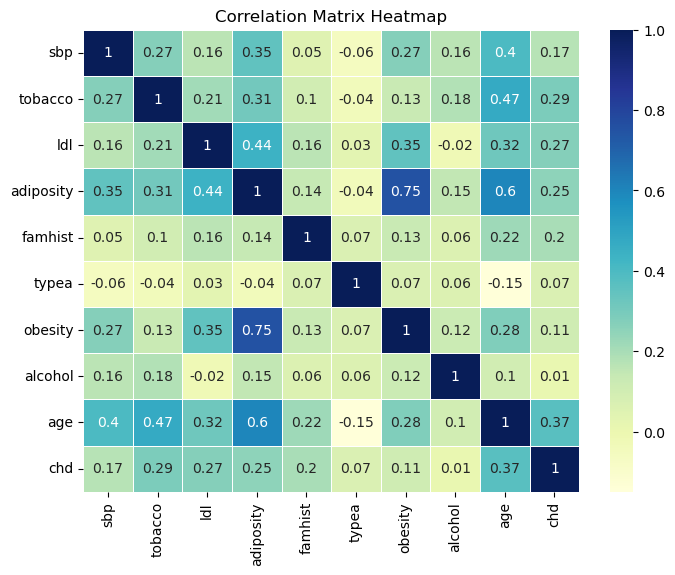

In [21]:
correlation_matrix = heart_train.corr().round(2)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap ='YlGnBu', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### plotScatterMatrix

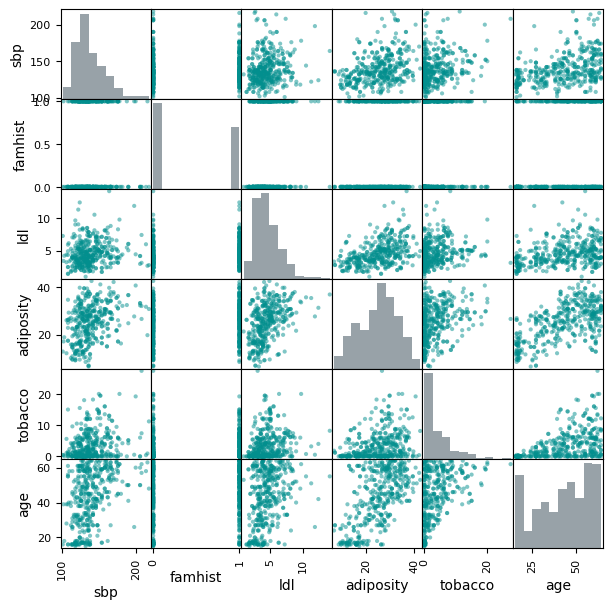

In [22]:
import pandas.plotting as ppt
heart_train_ltd = heart_train.loc[:,['sbp','famhist','ldl','adiposity','tobacco','age','chd']]
ppt.scatter_matrix(heart_train_ltd.drop('chd', axis = 1), alpha=0.5, figsize=(7, 7), 
                   diagonal='hist', color= '#028f8e', hist_kwds={'color': '#98a2a8'})
plt.show()

#### Find similar relationships for at least 3-4 columns that you think can play a role in prediction

/var/folders/dt/9152h3fd4nd9ty5xslc7s6400000gn/T/ipykernel_94658/2913135080.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heart_train.drop('chd', axis =1).corrwith(heart_train.chd).plot(kind = 'bar', color = '#028f8e', grid = True, figsize = (7,5),


<Axes: title={'center': 'Correlation with CHD'}>

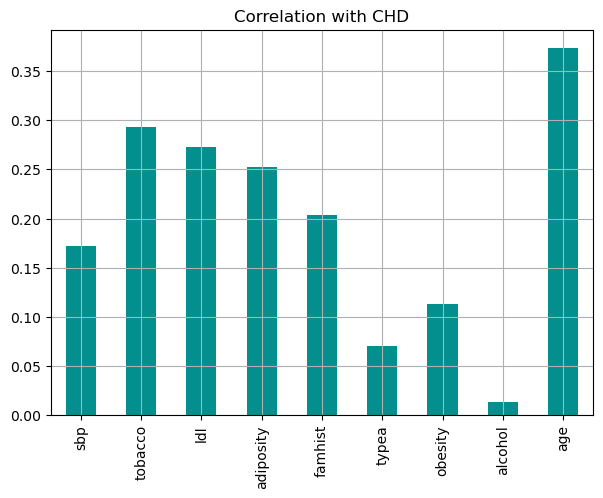

In [23]:
heart_train.drop('chd', axis =1).corrwith(heart_train.chd).plot(kind = 'bar', color = '#028f8e', grid = True, figsize = (7,5), 
                                                                title = "Correlation with CHD")

#### Based on the above we identified the following columns have a significant impact on the CHD
#### SBP, Tobacco, LDL, Adiposity, Famhist and Age
#### In order to visualize the correlation of each of the above attributes with deaths, we will plot histograms for all of them

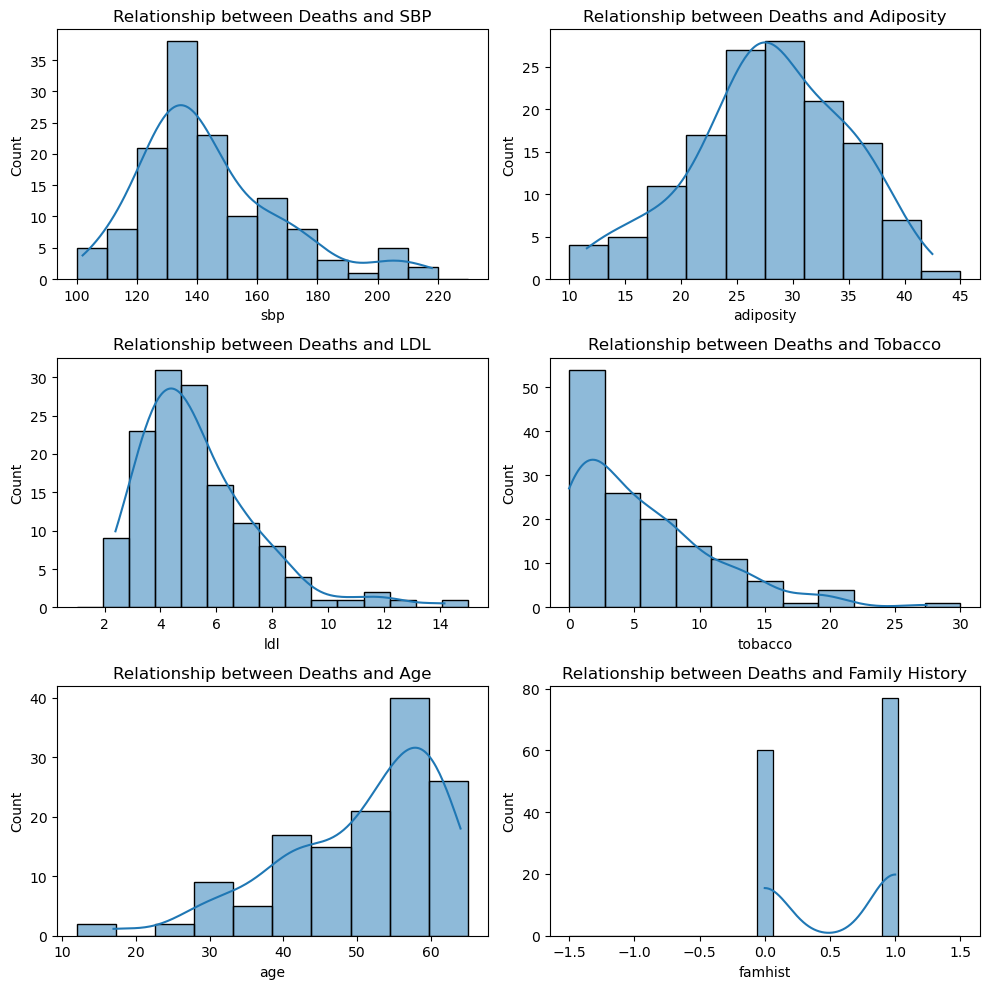

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

sns.histplot(x = heart_train.query("chd == 1")["sbp"] , binrange = (100, 230), kde = True, ax=axes[0, 0])
sns.histplot(x = heart_train.query("chd == 1")["adiposity"] , binrange = (10, 45), kde = True, ax=axes[0, 1])
sns.histplot(x = heart_train.query("chd == 1")["ldl"] , binrange = (1, 15), kde = True, ax=axes[1, 0])
sns.histplot(x = heart_train.query("chd == 1")["tobacco"] , binrange = (0, 30), kde = True, ax=axes[1, 1])
sns.histplot(x = heart_train.query("chd == 1")["age"] , binrange = (12, 65), kde = True, ax=axes[2, 0])
sns.histplot(x = heart_train.query("chd == 1")["famhist"] , binrange = (-1.5, 1.5), kde = True, ax=axes[2, 1])

axes[0, 0].set_title('Relationship between Deaths and SBP')
axes[0, 1].set_title('Relationship between Deaths and Adiposity')
axes[1, 0].set_title('Relationship between Deaths and LDL')
axes[1, 1].set_title('Relationship between Deaths and Tobacco')
axes[2, 0].set_title('Relationship between Deaths and Age')
axes[2, 1].set_title('Relationship between Deaths and Family History')
plt.tight_layout() 
plt.show()

#### Applying the regression models to the dataset with only the above identified attributes

In [25]:
heart_train_ltd_data = heart_train_ltd.drop('chd',axis = 1)
heart_train_ltd_target = heart_train_ltd['chd']

In [26]:
regression_model1 = LogisticRegression()
regression_model1.fit(heart_train_ltd_data,heart_train_ltd_target)
print("Train: ", regression_model1.score(heart_train_ltd_data, heart_train_ltd_target))

Train:  0.7305825242718447


#### Lets try to increase the accuracy by scaling the data

In [27]:
scaler = StandardScaler()
heart_train_ltd_data_scaled = pd.DataFrame(scaler.fit_transform(heart_train_ltd_data), 
                                           columns = heart_train_ltd_data.columns)
display(heart_train_ltd_data_scaled.head())

,sbp,famhist,ldl,adiposity,tobacco,age
0,-0.256537,1.175374,-0.579093,0.340015,2.201131,0.417783
1,-0.354446,1.175374,0.999471,1.430374,0.561429,0.153075
2,0.135101,-0.850793,-0.642874,-1.157775,0.085029,-0.310165
3,-1.235630,1.175374,0.000245,-1.364723,0.091677,1.013377
4,-1.235630,1.175374,-0.403697,-0.743878,-0.812375,-0.905759


In [28]:
regression_model2 = LogisticRegression()
regression_model2.fit(heart_train_ltd_data_scaled,heart_train_ltd_target)
print("Train: ", regression_model2.score(heart_train_ltd_data_scaled, heart_train_ltd_target))

Train:  0.7330097087378641


#### Now lets use the trained model on the test dataset to make predictions

In [29]:
heart_test = pd.read_csv('heart-test.csv')
heart_test.drop("ID",axis=1, inplace=True)
heart_test.shape
heart_test['famhist'] = heart_test['famhist'].replace(['Present', 'Absent'] , [1, 0])

In [30]:
heart_test_data = heart_test.loc[:,['sbp','famhist','ldl','adiposity','tobacco','age']]
heart_test_data_preds = regression_model1.predict(heart_test_data)
print(heart_test_data_preds)

[1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0]


#### Append the predictions to the main test dataset

In [31]:
heart_test['chd'] = heart_test_data_preds
display(heart_test.head())

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,114,4.08,4.59,14.60,1,62,23.11,6.72,58,1
1,114,0.00,3.83,19.40,1,49,24.86,2.49,29,0
2,132,0.00,5.80,30.96,1,69,30.11,0.00,53,0
3,206,6.00,2.95,32.27,0,72,26.81,56.06,60,0
4,134,14.10,4.44,22.39,1,65,23.09,0.00,40,0


#### Apply logistic regression on the test dataset with the predicted values and see the accuracy of the model

In [32]:
heart_test_target = heart_test['chd']
regression_model3 = LogisticRegression()
regression_model3.fit(heart_test_data,heart_test_target)
print("Test: ", regression_model3.score(heart_test_data, heart_test_target))
print("MSE: ", mean_squared_error(regression_model3.predict(heart_test_data), heart_test_target, squared=True))

Test:  0.993006993006993
MSE:  0.006993006993006993


#### Thank you